In [3]:
# ! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
#!curl -s https://course.fast.ai/setup/colab | bash


!pip install torch --upgrade
!pip install torchvision --upgrade
!pip install fastai --upgrade

# 4. Mount Google Drive

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = 'gdrive/My Drive/Colab Notebooks/'
base_dir = root_dir + 'yourfolder'


# 5. Import fastai
import torch
import torchvision
import fastai
from fastai.vision.all import *


Mounted at /content/gdrive


In [4]:
fastai.__version__

'2.5.2'

# Neuer Abschnitt

Nachdem fastai und pytorch geladen wurden, muss das DataLoaders Objekt erstellt werden <br>
dazu müssen die daten geladen werden.
Dazu müssen
1. die Datenbasis in die cloud hochgeladen sein, damit google colab drauf zugreifen kann
2. ein liste erstellt werden, in der die Pfäde der einzelnen Bilder aufgeführt sind (über die Pfäde wird auf die Datei zugegriffen)
3. bekannt sein, wie fastai auf die label zugreifen kann (https://docs.fast.ai/vision.data.html) (generell per dateiname, pfad, dataframe, csv-datei oder liste)
4. wie die dateien in training und validation set unterteilt werden sollen (bei *from_folder* kann der ordern explizit angegeben werden, bei allen anderen kann man per *valid_pct* und *seed* angeben, wie viel prozent als validation set genutzt werden sollen)


In [5]:
filepath = r'/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data'
files = get_image_files(filepath)
print(len(files))
#files[0:5]


10761


Danach kannn das netzwerk initialisiert werden (genannt learner) <br>
dieses besteht aus dem DataLoaders-Objekt und der Architektur und der Metrik <br>
anschließend kann es für eine bestimme anzahl an epochen finegetuned werden.

Bilder bereinigen

In [6]:
import itertools
files_it = iter(files)
failed_total = []
failed_batch = 500
for j in range(int(len(files)/failed_batch)):
  sublist = []
  for i in range(failed_batch):
    sublist.append(next(files_it))

  failed = verify_images(sublist)
  failed.map(Path.unlink)
  failed_total = failed_total + failed
  print( j, failed_total)

0 []


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


1 []


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


2 []
3 []
4 []
5 []
6 []
7 []
8 []


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


9 [Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Meat/Ham/00000085.jpg')]
10 [Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Meat/Ham/00000085.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Cereals_grains/Mais/00000091.jpg')]
11 [Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Meat/Ham/00000085.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Cereals_grains/Mais/00000091.jpg')]
12 [Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Meat/Ham/00000085.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Cereals_grains/Mais/00000091.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Trainin

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7436 bytes but only got 7408. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag)


14 [Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Meat/Ham/00000085.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Cereals_grains/Mais/00000091.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Nuts_Seeds/Walnut/00000105.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Nuts_Seeds/Almond/00000140.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Nuts_Seeds/Macadamia/00000108.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Nuts_Seeds/Macadamia/00000147.jpg'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Nuts_Seeds/Cashew/00000067.png'), Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/Nutrit

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,3.367881,2.010610,0.497904,08:37


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7436 bytes but only got 7408. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag)


epoch,train_loss,valid_loss,error_rate,time
0,2.054124,1.663650,0.425245,08:54
1,1.500260,1.463885,0.382860,08:59
2,0.957653,1.418857,0.366558,09:00


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7436 bytes but only got 7408. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Ex

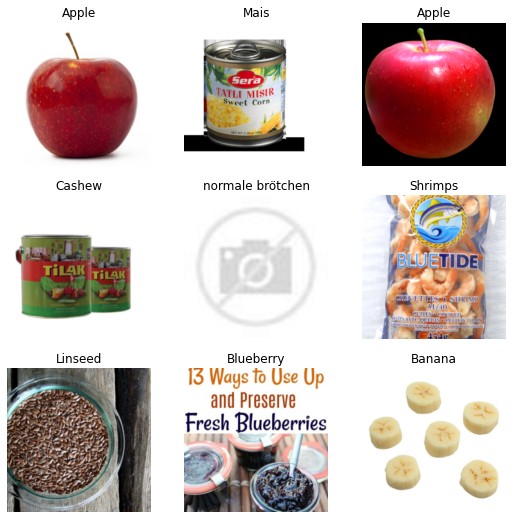

In [7]:

# files.remove(Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/Training_Data/Food_Categories/Fruits/Raspberry/00000064.jpg'))


dls = ImageDataLoaders.from_folder(filepath, files, valid_pct=.2, seed=42, item_tfms=Resize(224))
dls.show_batch()
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

55 ['Almond', 'Apple', 'Apricot', 'Asparagus', 'Banana', 'Blueberry', 'Brokkoli', 'Carrots', 'Cashew', 'Cherry', 'Chicken', 'Cucumber', 'DL_Asparagus', 'DL_Brokkoli', 'DL_Carrots', 'DL_Cucumber', 'Garlic', 'Green beans', 'Hafer', 'Ham', 'Hazelnut', 'Herring', 'Linseed', 'Macadamia', 'Mais', 'Onions', 'Peach', 'Peanut', 'Pear', 'Pecan', 'Pumpkin', 'Pumpkinseed', 'Raspberry', 'Rice', 'Salmon', 'Sardine', 'Sausages', 'Sesame', 'Shrimps', 'Spinach', 'Strawberry', 'Tomatoes', 'Trout', 'Walnut', 'Watermelon', 'bacon', 'baguette', 'beef steak', 'brot', 'chiaseed', 'körner brötchen', 'lenses', 'normale brötchen', 'sunflower seeds', 'toastbrot']


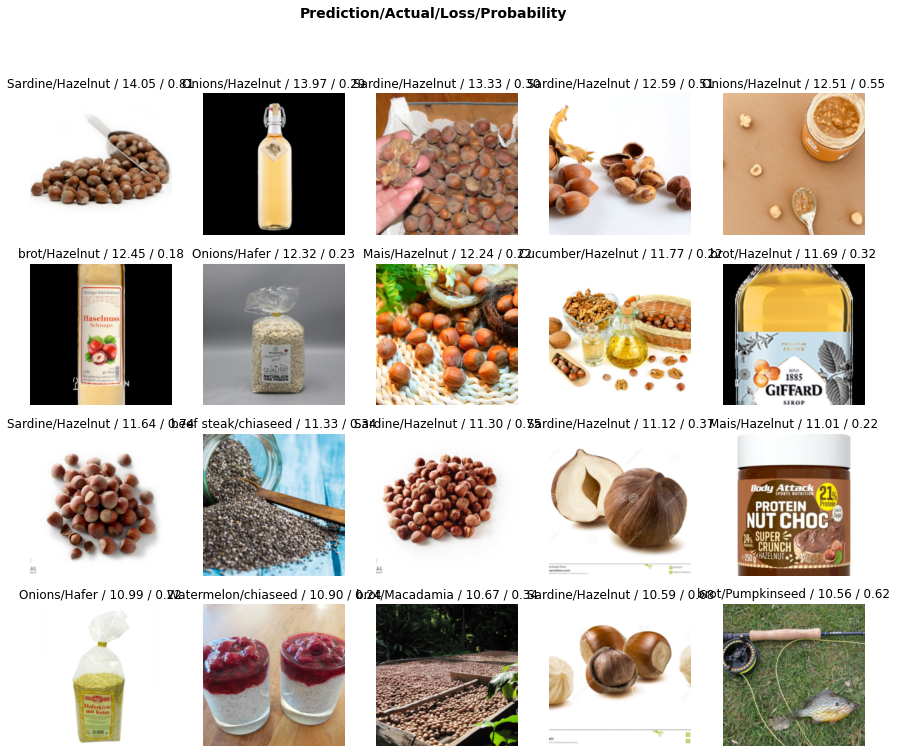

In [13]:
# learn = cnn_learner(dls, resnet34, metrics=error_rate)
# learn.fine_tune(3)
print(len(dls.vocab), dls.vocab)
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()
interp.plot_top_losses(20)

In [15]:
ep = 10
learn.fine_tune(ep)
learn.save(f'/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/food_nn_ep{ep}')


epoch,train_loss,valid_loss,error_rate,time
0,3.333909,2.041342,0.520727,09:03


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes sh

epoch,train_loss,valid_loss,error_rate,time
0,2.112311,1.716878,0.450396,08:51
1,1.722769,1.566475,0.404285,08:49
2,1.398951,1.569049,0.396367,08:52
3,1.010706,1.564553,0.376339,09:11
4,0.649758,1.603007,0.367490,09:28
5,0.408710,1.571339,0.357708,09:24
6,0.232682,1.621577,0.356311,09:37
7,0.133083,1.639257,0.358174,09:30
8,0.096531,1.640410,0.355380,09:24
9,0.082009,1.627548,0.354448,09:40


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes sh

Path('/content/gdrive/MyDrive/TechlabsProject/GitHub/NutritionTracker/food_nn_ep10.pth')

In [14]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner

NameError: ignored

In [ ]:
learn = load_learner(pth)
learn.unfreeze()